In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt

In [5]:
hotel = pd.read_csv("hotel.csv")

In [6]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
hotel["stays_in_weekend_nights"].max()

19

In [10]:
hotel.shape[0]

119390

In [11]:
#5.a.
hotel.dropna(axis=1, thresh=len(hotel)*.5, inplace=True)

In [12]:
#5.b.
hotel['country'].mode()[0]

'PRT'

In [13]:
hotel['country'].isna().sum()

488

In [14]:
hotel['country'].fillna(hotel['country'].mode()[0], inplace=True)

In [15]:
hotel['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [16]:
hotel['country'].isna().sum()

0

In [17]:
hotel['children'].isna().sum()

4

In [18]:
hotel['children'].fillna(hotel['children'].mode()[0], inplace=True)

In [19]:
hotel['children'].isna().sum()

0

In [20]:
#5.c.
hotel['agent'].isna().sum()

16340

In [21]:
hotel['agent'].fillna(hotel['agent'].mode()[0], inplace=True)

In [22]:
hotel['agent'].isna().sum()

0

In [23]:
hotel['agent']

0           9.0
1           9.0
2           9.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [24]:
#6
#Lead time ini apa ya? Satuannya apa?
hotel['lead_time']

0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64

In [25]:
# long: > 6 bulan
# med: > sebulan
# short: sisanya
hotel['category'] = np.where(hotel['lead_time'] > 180, "long", np.where(hotel['lead_time'] > 30, "medium", "short"))

In [26]:
#7
hotel['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

In [27]:
pd.to_datetime(hotel['reservation_status_date'],format='%Y/%m/%d', errors = 'coerce')

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [28]:
hotel.loc[hotel['reservation_status_date'] > '2017-01-01']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,category
9788,Resort Hotel,1,89,2017,January,1,2,1,3,2,...,No Deposit,240.0,0,Transient,46.80,0,1,No-Show,2017-01-02,medium
9805,Resort Hotel,1,6,2017,January,1,4,0,1,1,...,No Deposit,9.0,0,Transient,39.00,0,0,Canceled,2017-01-03,short
9809,Resort Hotel,1,112,2017,January,1,4,2,4,2,...,No Deposit,240.0,0,Transient,52.00,0,2,No-Show,2017-01-04,medium
9818,Resort Hotel,1,2,2017,January,1,6,2,3,1,...,No Deposit,240.0,0,Transient,43.00,0,1,No-Show,2017-01-06,short
9838,Resort Hotel,1,0,2017,January,2,10,0,1,2,...,No Deposit,9.0,0,Transient,0.00,0,0,Canceled,2017-01-10,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,short
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,medium
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,medium
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,medium


In [29]:
hotel['category']

0           long
1           long
2          short
3          short
4          short
           ...  
119385     short
119386    medium
119387    medium
119388    medium
119389      long
Name: category, Length: 119390, dtype: object

In [30]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,long
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,long
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,short
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,short
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,short
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,medium
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,medium
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,medium


In [31]:
# 8
month = hotel['arrival_date_month'].groupby(hotel['arrival_date_month']).count()
month_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_index.reverse()
month = month.reindex(month_index, axis=0)

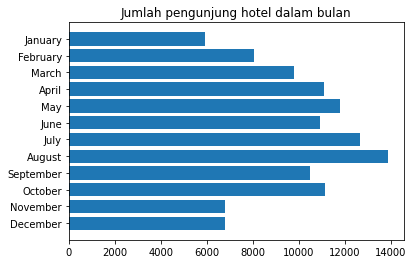

In [34]:
plt.title('Jumlah pengunjung hotel dalam bulan')
plt.barh(month_index, month)
plt.show()

In [33]:
 hotel['arrival_date_month'].groupby(hotel['arrival_date_month']).count()

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64